In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/startup-logistic-regression/50_Startups.csv


In [2]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sklearn

In [3]:
print(os.listdir("../input"))

['startup-logistic-regression']


In [4]:
# Importing the dataset
dataset = pd.read_csv('../input/startup-logistic-regression/50_Startups.csv')

In [5]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


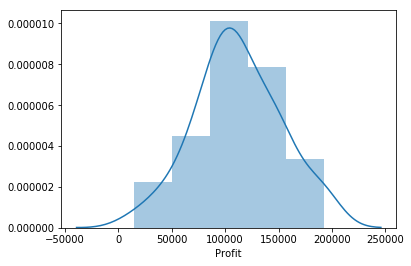

In [6]:
## EDA on Dataset -

#Histgram on Profit
sns.distplot(dataset['Profit'],bins=5,kde=True)

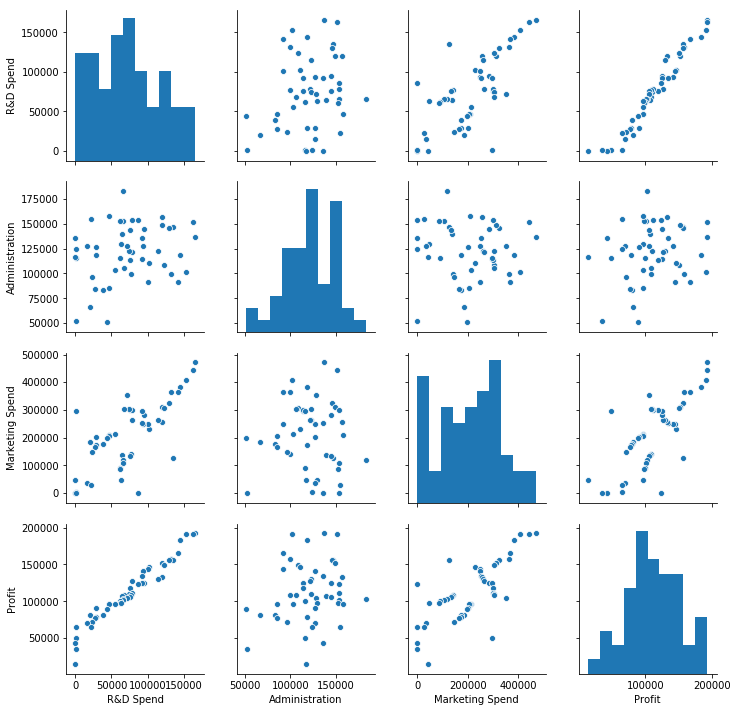

In [7]:
#Correlation  chart on different variables for comparision 
# Profit Vs R & Spend is very linear and almost same for Marketing spend
# Profit spend vs Administration distribution is very scattered 
sns.pairplot(dataset)

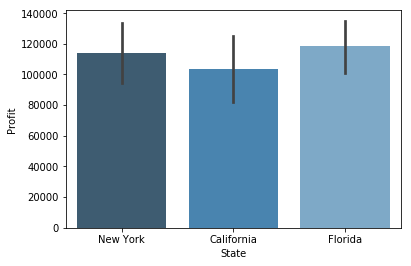

In [8]:
# profit split in State level - Looks Florida has the maximum Profit
sns.barplot(x='State',y='Profit',data=dataset, palette="Blues_d")
#sns.lineplot(x='State',y='Profit',data=dataset)

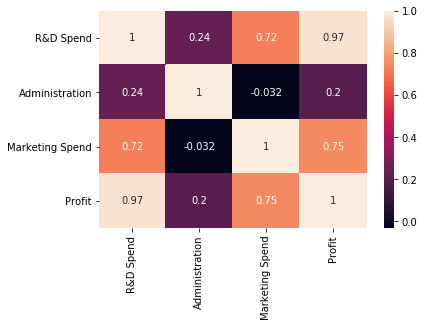

In [9]:
#gives positive & negative relation between categories
sns.heatmap(dataset.corr(), annot=True)

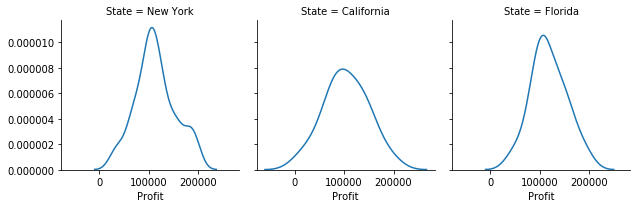

In [10]:
# spread of profit against state 
g=sns.FacetGrid(dataset, col='State')
g=g.map(sns.kdeplot,'Profit')

In [11]:
# spliting Dataset in Dependent & Independent Variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values


In [12]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()



/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [13]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]


In [14]:
# Splitting the dataset into the Training set and Test set
import sklearn

#from sklearn import train_test_split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('Coefficients: \n', regressor.coef_) 
regressor.score(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

Coefficients: 
 [-9.59284160e+02  6.99369053e+02  7.73467193e-01  3.28845975e-02
  3.66100259e-02]


In [18]:
print(regressor)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [19]:
y_pred

array([103015.20159796, 132582.27760815, 132447.73845175,  71976.09851258,
       178537.48221056, 116161.24230166,  67851.69209676,  98791.73374687,
       113969.43533013, 167921.06569551])